In [38]:
# Import packages
# General
import pandas as pd
import numpy as np
# Data visualisation  
import matplotlib.pyplot as plt   
import seaborn as sns
# For modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from math import sqrt 
        
# For dates
from datetime import datetime as dt
from datetime import timedelta
# For holidays
import holidays
import pickle

In [71]:
# open a file, where you stored the pickled data
year_list = ['2015','2016', "2017", "2018"]
columns = ['main'] 

for year in year_list: 
    filename = 'rides_per_month' + year + '.pckl'
    file = open(filename, 'rb')
    tmp = pickle.load(file)
    if year == '2015':
        temp_rides = pd.DataFrame(index = tmp.index.values.tolist(), columns = tmp.values).reset_index()
        rides = pd.DataFrame(index = tmp.index.values.tolist(), columns = columns)
        rides['main'] = tmp.values
    else: 
        temp_rides = pd.DataFrame(index = tmp.index.values.tolist(), columns = tmp.values).reset_index()
        rides_temp2 = pd.DataFrame(index = tmp.index.values.tolist(), columns = columns)
        rides_temp2['main'] = tmp.values
        rides = rides.append(rides_temp2)

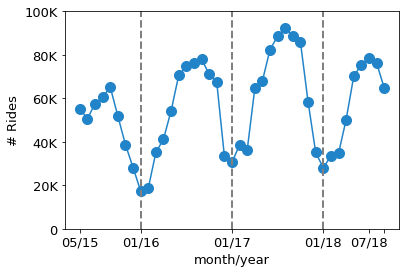

In [153]:
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
%matplotlib inline
f = plt.figure()
plt.plot(rides['main'].reset_index()['main'], 'o-', color = (33/255, 131/255, 200/255), markersize = 10)


plt.plot([8, 8], [0, 100000], color=(0.5, 0.5, 0.5), linestyle='--', linewidth=2)
plt.plot([20, 20], [0, 100000], color=(0.5, 0.5, 0.5), linestyle='--', linewidth=2)
plt.plot([32, 32], [0, 100000], color=(0.5, 0.5, 0.5), linestyle='--', linewidth=2)
#    plt.plot([36.5, 36.5], [0, 100000], color=(0.85, 0.85, 0.85), linestyle='--', linewidth=2)
#plt.plot([38, 38], [0, 100000], color=(0.5, 0.5, 0.5), linestyle='--', linewidth=2)
plt.ylim([0, 100000])

           
plt.xlabel('month/year', fontsize = 13)
plt.ylabel('# Rides', fontsize = 13)
ax = plt.gca()

ax.get_yticks([0,20000,40000,60000,80000,100000]) # choose which x locations to have ticks
ax.set_yticklabels(('0','20K','40K','60K','80K','100K'), fontsize = 13)
ax.set_xticks([0, 8, 20, 32, 38, 40]) # choose which x locations to have ticks
ax.set_xticklabels(('05/15','01/16','01/17','01/18','07/18'), fontsize = 13)
plt.show()
# this is why we drop the weird week
f.savefig("range.pdf", bbox_inches = 'tight')                        